# Task 2 Hackathon

### ANKIT SANJYAL

# Lets go through the exploratory data analysis process before building the ml model.


## Importing data

In [1]:
import pandas as pd   #deals with the datasets
import numpy as np

In [2]:
dataset = pd.read_csv('data_2_var.csv')  #loading the dataset

In [3]:
dataset.columns = ('X','Y')   #lets add the columns name to the dataset

In [4]:
dataset.head() #checking if we are heading towards the good way.

,X,Y
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


Alright it seems to be bivariate data with both the numeric variables or columns

In [5]:
dataset.shape

(1110, 2)

Here we can see we have 1110 rows and 2 columns

In [6]:
dataset.dtypes

X    float64
Y    float64
dtype: object

Here both the variables seems to be float i.e, numeric as i said earlier.

In [7]:
dataset.describe()

,X,Y
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


Lets watch out what both data columns or variables looks like


# Univariate Data Analysis

In this step we will be analysing the data set given to us one by one all the columns. 

Lets go for the column X

From above method describe() many central tendency we can see or measure like:
    Mean = 6.899714
    standard deviation = 79.324069
    minimum value = -134.962839
    etc etc

But lets visualize them using some plots or using magic of python you can say..

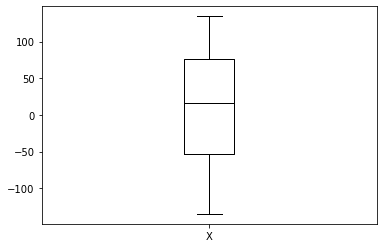

In [8]:
import matplotlib.pyplot as plt

dataset.boxplot(column=['X'], grid=False, color='black')

This box plot as we can see explain exact what we saw in the above method describe().

Lets check a density curve for this:

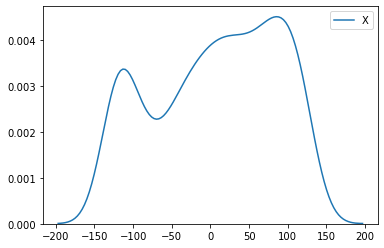

In [9]:
import seaborn as sns

sns.kdeplot(dataset['X'])

Alright the data set doesnot seems like normally distributed . No problem we will take care of that later.

Lets have a look at the prediction column or Y

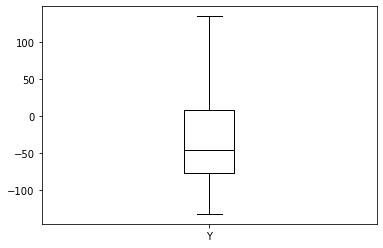

In [10]:
dataset.boxplot(column=['Y'], grid=False, color='black')

Alright this doesnt seems to be really happy or is it? 

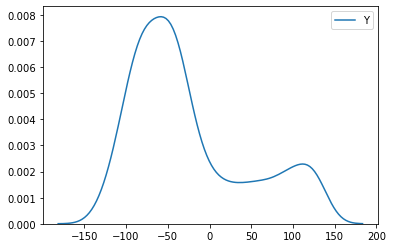

In [11]:
sns.kdeplot(dataset['Y'])

But this here looks in great shape or not

# Bivariate Data Analysis

Since It is the bivariate data we need to some bivariate data analysis through the dataset.
Since both the variables are numeric or continuous what we can do is:
Correlation


In [12]:
dataset.corr()

,X,Y
X,1.000000,0.454607
Y,0.454607,1.000000


we can see the correlation between two variables here and looks not much defining as of now
Rule of correlation:
+1 == Perfectly positive
-1 == Perfectly negative
0 == No relation

Here if we are looking for relation or correlation between X and Y we are finding 0.454607 which is not the great score both the ways.

Lets check out the correlation plot between them
-----------------------------------------------------------------------

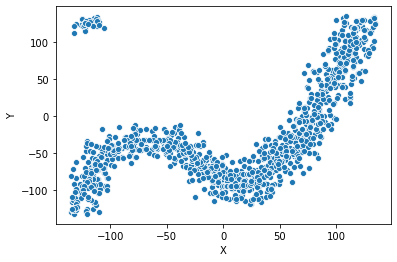

In [13]:
sns.scatterplot(data=dataset,x='X',y='Y')

Alright here we can see some really cool relation between the variables
looks like there are some outliers too that we will deal with later.
Till now we got to know that there is handsome relation between these two variables and that can be made better by some procedures.

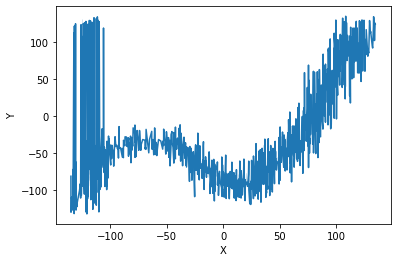

In [14]:
sns.lineplot(data=dataset,x="X",y="Y")

We can see the line plot for these two variables too but not so much affective for this procedure i guess.

We can also see histogram and scatter plot on the same thing as:

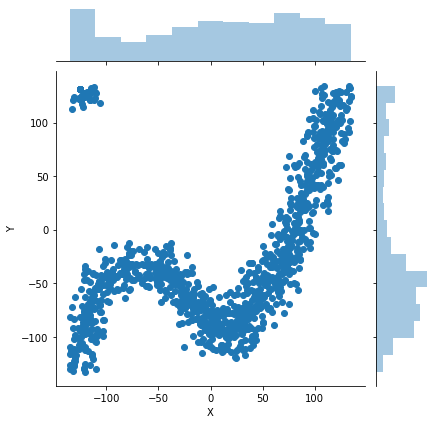

In [15]:
sns.jointplot(data=dataset,x='X',y="Y")

Finally lets have a look at the heatmap

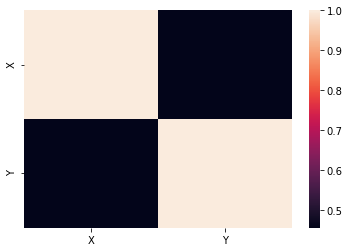

In [16]:
sns.heatmap(dataset.corr())

All same things that we described earlier.

# Missing Value or Null Value treatment

We can snap and we will find if the data set has the missing values or not like:

In [17]:
dataset.isnull().sum()

X    0
Y    0
dtype: int64

Alright it seems like we dont have the null values. So lets move on to the next step

#  Outliers Treatment

Lets use inter quartile range to detect the outliers

In [18]:
# IQR
Q1 = np.percentile(dataset['X'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dataset['X'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [19]:

# Above Upper bound
upper = dataset['X'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = dataset['X'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))


Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1105    False
1106    False
1107    False
1108    False
1109    False
Name: X, Length: 1110, dtype: bool
(array([], dtype=int64),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1105    False
1106    False
1107    False
1108    False
1109    False
Name: X, Length: 1110, dtype: bool
(array([], dtype=int64),)


Alright it seems like we can not detect the outliers too.

Lets Move On to the Next Step

Alright Everything Looks great 
Lets move on to the Model Building 
Or the Machine Learning Process.

# Model Building 

In [20]:
X = dataset['X']   #feature
Y = dataset['Y']   # Target Variable

We will use a validation hold-out set, that is a sample of data that we hold back from analysis and modelling. And use that data, right at the end to confirm the accuracy of our final model.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(888,)
(222,)
(888,)
(222,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [24]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

Lets compare the models or algorithms at their default parameters.

In [29]:
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    cv_result = cross_val_score(model, X_train.reshape(-1,1), y_train, cv=10, scoring='neg_mean_squared_error')
    results.append(cv_result)
    names.append(name)
    print('{}: {:.5f}({:.5f})'.format(name, cv_result.mean(), cv_result.std()))

LR: -3935.88014(456.44557)
LASSO: -3935.88189(456.44964)
EN: -3935.88056(456.44864)
KNN: -1983.73559(692.63457)
CART: -2797.16226(1047.54221)
SVM: -2109.10404(436.97891)


Its too tough to read and understand this
Lets Visualize this thing

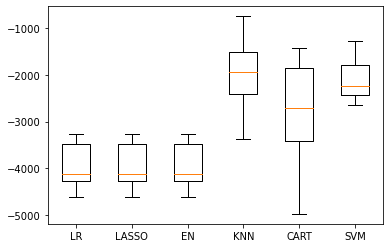

In [30]:
plt.boxplot(results)
plt.xticks(range(1, len(names)+1), names)
plt.show()

Here is what we can see how all the models works on this dataset in terms of the validation score.

But Lets make it little better 


# Standarization using pipelines

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])))

Lets again check if we can see any differences on working of the models at the default parameters only.

In [32]:
results = []
names = []
for name, model in pipelines:
    cv_result = cross_val_score(model, X_train.reshape(-1,1), y_train, cv=10, scoring='neg_mean_squared_error')
    results.append(cv_result)
    names.append(name)
    print('{}: {:.5f}({:.5f})'.format(name, cv_result.mean(), cv_result.std()))

ScaledLR: -3935.88014(456.44557)
ScaledLASSO: -3936.99734(456.97537)
ScaledEN: -4040.41217(484.35315)
ScaledKNN: -1983.73559(692.63457)
ScaledCART: -2797.16226(1047.54221)
ScaledSVM: -2109.10404(436.97891)


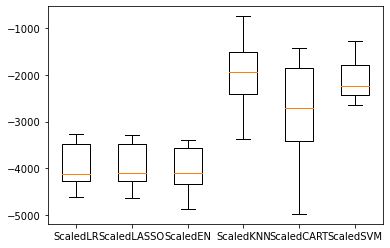

In [33]:
plt.boxplot(results)
plt.xticks(range(1, len(names)+1), names)
plt.show()


It seems much better than the previous one i guess.

But we wont stop Here
Lets do the hyper parameter Tuning

# Hyper Parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train.reshape(-1,1))
rescaledX = scaler.transform(X_train.reshape(-1,1))
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
params = dict(n_neighbors = k_values)
model = KNeighborsRegressor()
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=10)
grid_result = grid.fit(rescaledX, y_train)

Lets Check The Results

In [35]:
print('Best: {:.5f} using {}\n'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('{:.5f} ({:.5f}) with: {}'.format(mean, std, param))

Best: -1632.95597 using {'n_neighbors': 19}

-3000.84967 (1033.43273) with: {'n_neighbors': 1}
-2056.28288 (754.45340) with: {'n_neighbors': 3}
-1983.73604 (692.63454) with: {'n_neighbors': 5}
-1880.61196 (682.29395) with: {'n_neighbors': 7}
-1776.26310 (601.40101) with: {'n_neighbors': 9}
-1715.42059 (466.53805) with: {'n_neighbors': 11}
-1727.36559 (482.89640) with: {'n_neighbors': 13}
-1676.26643 (456.96443) with: {'n_neighbors': 15}
-1648.79360 (450.64604) with: {'n_neighbors': 17}
-1632.95597 (411.33280) with: {'n_neighbors': 19}
-1633.80241 (394.28569) with: {'n_neighbors': 21}


We can Also Use the ensemble learning techniques to improve the models efficency and accuracy.

# Ensemble Methods

In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBF', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

Comparing algorithms at default tuning parameters:

In [37]:
results = []
names = []
for name, model in ensembles:
    cv_result = cross_val_score(model, X_train.reshape(-1,1), y_train, cv=10, scoring='neg_mean_squared_error')
    results.append(cv_result)
    names.append(name)
    print('{}: {:.5f}({:.5f})'.format(name, cv_result.mean(), cv_result.std()))

ScaledAB: -1943.80202(386.50199)
ScaledGBF: -1927.37701(745.07067)
ScaledRF: -2185.86150(770.22474)
ScaledET: -2476.45719(918.77416)


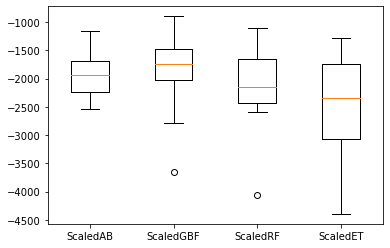

In [38]:
plt.boxplot(results)
plt.xticks(range(1, len(names)+1), names)
plt.show()

Lets Do the hyper parameter Tuning to the ensemble models we built right now.

In [39]:
scaler = StandardScaler().fit(X_train.reshape(-1,1))
rescaledX = scaler.transform(X_train.reshape(-1,1))
params = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor()
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=10)
grid_result = grid.fit(rescaledX, y_train)

Check Out The Results Too

In [40]:
print('Best: {:.5f} using {}\n'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('{:.5f} ({:.5f}) with: {}'.format(mean, std, param))

Best: -1732.46553 using {'n_estimators': 50}

-1732.46553 (616.32192) with: {'n_estimators': 50}
-1927.37701 (745.07067) with: {'n_estimators': 100}
-2068.15483 (825.71873) with: {'n_estimators': 150}
-2145.03373 (884.46055) with: {'n_estimators': 200}
-2176.30616 (909.89521) with: {'n_estimators': 250}
-2204.93392 (913.54208) with: {'n_estimators': 300}
-2255.58084 (919.26427) with: {'n_estimators': 350}
-2299.83452 (937.49214) with: {'n_estimators': 400}


Finding the best paramters, i.e. n_estimators for ensemble method:

In [41]:
best_estimator = grid_result.best_params_['n_estimators']
best_estimator

50

# Finalizing Model

After going through all the variations, I try to come up with the best possible model, using a combination of the variations.

In [42]:
scaler = StandardScaler().fit(X_train.reshape(-1,1))
rescaledX = scaler.transform(X_train.reshape(-1,1))
model = GradientBoostingRegressor(n_estimators=best_estimator)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(n_estimators=50)

Predictions

In [43]:
from sklearn.metrics import mean_squared_error
rescaledTestX = scaler.transform(X_test.reshape(-1,1))
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

1400.390944320777


# What the question asked to me
# Linear Regression Model

In [44]:
LinReg = LinearRegression()
LinReg.fit(X_train.reshape(-1,1),y_train)
predictions = LinReg.predict(X_test.reshape(-1,1))
print(mean_squared_error(y_test,predictions))

3660.0640164238102


We can see huge difference in mean squared error between my ensembled model and the asked linear regression model.


#                                                    THANK YOU
#                                                            !!!